In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.python.keras.callbacks import TensorBoard
from time import time
import matplotlib.pyplot as plt

In [2]:
spec_df = pd.read_csv("../resources/train_csv/dataset_800.csv")

In [3]:
spec_df.head()

,labels,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p9149,p9150,p9151,p9152,p9153,p9154,p9155,p9156,p9157,p9158
0,1,-6.183132,-3.060889,-5.354188,-3.662657,-4.614464,-5.273410,-11.373178,-4.326097,-5.518365,...,-14.516465,-13.076012,-11.118975,-15.492326,-12.431305,-15.911340,-11.732088,-13.357087,-12.095570,-12.871292
1,4,-0.266970,-5.309970,-0.296120,-0.684611,-1.294896,1.596504,3.280136,-1.314000,1.933664,...,-10.439977,-11.294376,-12.209732,-8.735964,-12.191380,-11.739184,-14.622268,-12.856207,-12.765238,-13.962063
2,9,-12.673690,-13.249184,-14.406206,-15.523113,-17.191128,-28.456907,-22.213850,-14.325003,-24.346071,...,-11.439842,-13.521468,-11.023044,-15.196858,-18.018612,-12.938553,-14.296396,-14.790267,-12.332949,-13.908995
3,5,-10.866162,-7.721181,-12.093289,-9.046763,-12.289345,-10.015794,-9.435381,-11.327034,-11.698851,...,-17.970510,-12.357756,-14.834009,-13.011232,-11.919509,-12.556593,-10.703555,-12.252587,-18.029612,-15.297669
4,9,-6.348920,-6.023167,-8.081329,-7.955781,-7.180146,-6.527071,-5.500566,-5.622000,-5.103750,...,-7.661866,-8.227815,-12.695795,-13.956952,-13.142410,-9.240787,-8.345701,-8.613430,-8.693604,-9.103238


In [4]:
labels = spec_df['labels'].values
labels = tf.keras.utils.to_categorical(labels) # one hot encode labels
spec_df.drop(labels="labels", axis='columns', inplace=True)
features = spec_df.values
features = features.reshape(-1, 129, 71, 1)

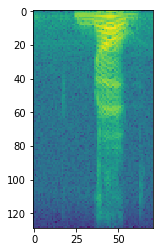

In [5]:
plt.imshow(features[0].reshape(129, 71))

In [13]:
tensorboard = TensorBoard(log_dir="logs/model_1_{}".format(time()))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="same",
                                 activation='relu', kernel_initializer='he_normal', input_shape=(129, 71, 1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 129, 71, 64)       640       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 129, 71, 64)       36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 43, 24, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 43, 24, 128)       73856     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 43, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 8, 128)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 15, 8, 256)       

In [14]:
model.fit(x=features,
          y=labels,
          batch_size=128,
          epochs=15,
          validation_split=0.2,
          callbacks=[tensorboard])

Train on 6400 samples, validate on 1600 samples
Epoch 1/15
6400/6400 [==============================] - 26s 4ms/sample - loss: 3.5639 - accuracy: 0.0991 - val_loss: 2.2950 - val_accuracy: 0.1462
Epoch 2/15
6400/6400 [==============================] - 25s 4ms/sample - loss: 2.3029 - accuracy: 0.1061 - val_loss: 2.2851 - val_accuracy: 0.2037
Epoch 3/15
6400/6400 [==============================] - 25s 4ms/sample - loss: 2.2461 - accuracy: 0.1572 - val_loss: 2.0877 - val_accuracy: 0.2188
Epoch 4/15
6400/6400 [==============================] - 25s 4ms/sample - loss: 2.0093 - accuracy: 0.2517 - val_loss: 1.6846 - val_accuracy: 0.3444
Epoch 5/15
6400/6400 [==============================] - 25s 4ms/sample - loss: 1.6027 - accuracy: 0.3936 - val_loss: 1.1712 - val_accuracy: 0.5331
Epoch 6/15
6400/6400 [==============================] - 25s 4ms/sample - loss: 1.1089 - accuracy: 0.5791 - val_loss: 0.8589 - val_accuracy: 0.6856
Epoch 7/15
6400/6400 [==============================] - 25s 4ms/sample

In [10]:
model.save('saved_models/model_2.h5')